In [1]:
import pywt # pip install PyWavelets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#read data
df = pd.read_csv("https://raw.githubusercontent.com/JhesorleyML/Lectures/refs/heads/main/Time%20Series%20Forecasting/Seasonal_sample.csv")
df.head()

,Time,Sales
0,2021-01,80
1,2021-02,90
2,2021-03,100
3,2021-04,110
4,2021-05,120


In [3]:
#Extracts the sales column as a 1D NumPy array; wavelet function work on arrays not pandas series
sales = df["Sales"].values
#perform DWT
coeffs = pywt.wavedec(sales, 'haar', level=3)

In [4]:
# put labels on wavelets coefficients
approx = coeffs[0]
detail1 = coeffs[1]
detail2 = coeffs[2]
detail3 = coeffs[3]

In [6]:
#Creates zero-filled arrays with the same shapes
#Setting a component to zero means removing that frequency band (to isolate components)
zeros_a = np.zeros_like(approx)
zeros_d1 = np.zeros_like(detail1)
zeros_d2 = np.zeros_like(detail2)
zeros_d3 = np.zeros_like(detail3)

#Reconstruction phase of every component
trend = pywt.waverec([approx, zeros_d1, zeros_d2, zeros_d3], 'haar')
d1 = pywt.waverec([zeros_a, detail1, zeros_d2, zeros_d3], 'haar')
d2 = pywt.waverec([zeros_a, zeros_d1, detail2, zeros_d3], 'haar')
d3 = pywt.waverec([zeros_a, zeros_d1, zeros_d2, detail3], 'haar')

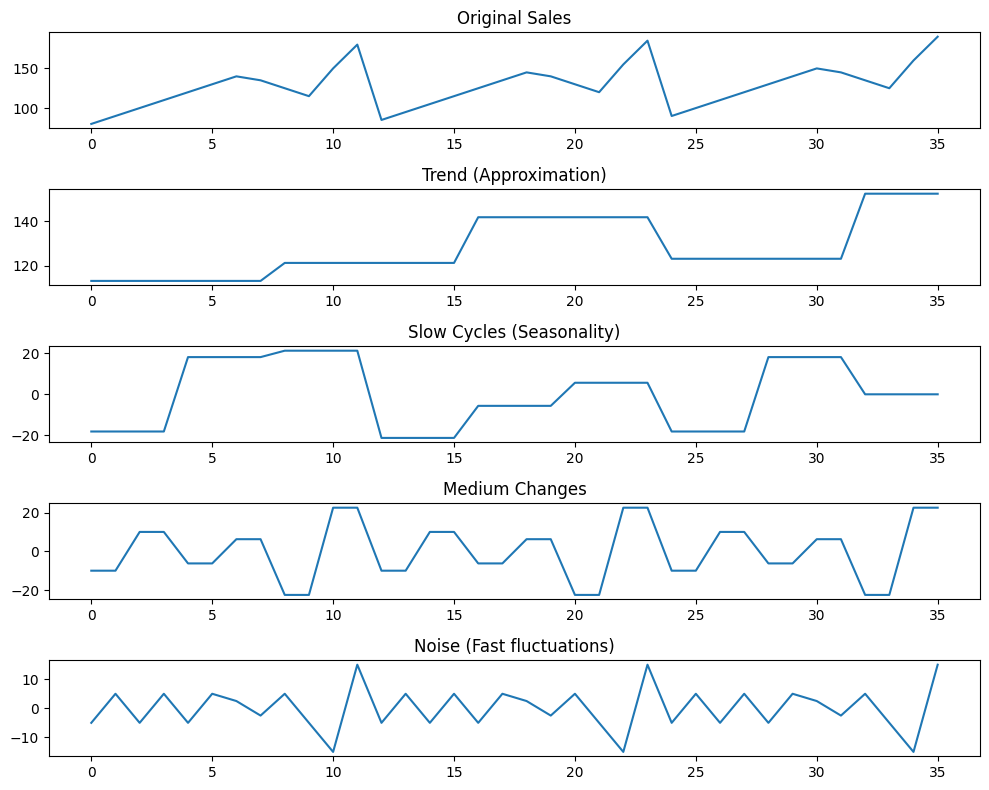

In [7]:
plt.figure(figsize=(10,8))

plt.subplot(5,1,1)
plt.plot(sales)
plt.title("Original Sales")

plt.subplot(5,1,2)
plt.plot(trend)
plt.title("Trend (Approximation)")

plt.subplot(5,1,3)
plt.plot(d1)
plt.title("Slow Cycles (Seasonality)")

plt.subplot(5,1,4)
plt.plot(d2)
plt.title("Medium Changes")

plt.subplot(5,1,5)
plt.plot(d3)
plt.title("Noise (Fast fluctuations)")

plt.tight_layout()
plt.show()